In [9]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# initialize time series for energy price p_t and energy consumption u_t both in period t

T = 120
t = np.linspace(1, T, num=T).reshape(T,1)
p = np.exp(-np.cos((t-15)*2*np.pi/T)+0.01*np.random.randn(T,1))
u = 2*np.exp(-0.6*np.cos((t+40)*np.pi/T) - 0.7*np.cos(t*4*np.pi/T)+0.01)

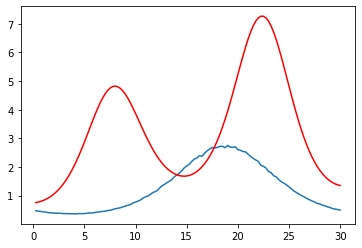

In [16]:
plt.figure(1)
plt.plot(t/4, p)
plt.plot(t/4, u, 'r')
plt.show()

In [12]:
Q = 35
C = 3
D = 3

# initialize decision variables by length T (total time length we consider)
q = cvx.Variable(shape=(T, 1))
c = cvx.Variable(shape=(T, 1))

In [13]:
# obejctive function, total energy costs
obj = p.T@(u+c)

In [21]:
# initialize constraints formulated in Convex Optimization by S.Boyd in A20.9

# maximum charge (C) and discharge (D) rate
cons = [c >= -D]
cons += [c <= C]

# maximum energy stored (Q) in battery q
cons += [q >= 0]
cons += [q <= Q]

# new energy stored in t+1 -> 'old' energy a_t-1 and energy consumed in c_t-1
cons += [q[1:] == q[:T-1] + c[:T-1]]

# we finish with same battery charge that we start with
cons += [q[0] == q[T-1] + c[T-1]]
cons += [u+c >= 0]

# optimal price vector
cost_star = cvx.Problem(cvx.Minimize(obj), cons).solve()
print(cost_star)

486.1936479830571


(0.0, 40.0)

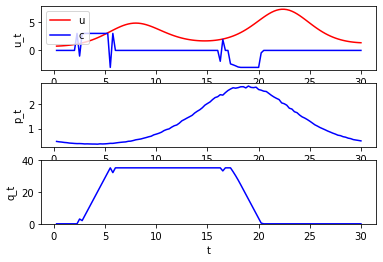

In [24]:
plt.figure(2)
ts = np.linspace(1, T, num=T).reshape(T,1)/4

# plot for energy consumption over t 
plt.subplot(3,1,1)
plt.plot(ts, u, 'r');
plt.plot(ts, c.value, 'b');
plt.xlabel('c')
plt.ylabel('u_t')
plt.legend(['u', 'c'])

# plot for energy price vector over t
plt.subplot(3,1,2)
plt.plot(ts, p, 'b');
plt.xlabel('t')
plt.ylabel('p_t')

# plot for energy stored in t, q_t
plt.subplot(3,1,3)
plt.plot(ts, q.value, 'b');
plt.xlabel('t')
plt.ylabel('q_t')

# scale for y-axis
plt.ylim((0, 40))

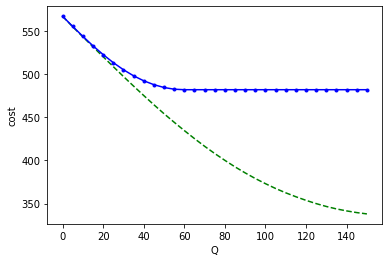

In [30]:
# Plot the tradeoff curves
# Plot the minimum total cost versus the storage capacity Q

N = 31
Qs = np.linspace(0, 150, num=N).reshape(N,1)

# charge/discharge limit 1
C, D = 1, 1
cost1 = np.zeros((N,1))
cost2 = np.zeros((N,1))
for i in range(N):
    Q = Qs[i]
    q = cvx.Variable(shape=(T, 1))
    c = cvx.Variable(shape=(T, 1))
    obj = p.T@(u+c)
    cons = [c >= -D]
    cons += [c <= C]
    cons += [q >= 0]
    cons += [q <= Q]
    cons += [q[1:] == q[:T-1] + c[:T-1]]
    cons += [q[0] == q[T-1] + c[T-1]]
    cons += [u+c >= 0]
    pstar = cvx.Problem(cvx.Minimize(obj), cons).solve()
    cost1[i] = pstar

# charge/discharge limit 3
C, D = 3, 3
for i in range(N):
    Q = Qs[i]
    q = cvx.Variable(shape=(T, 1))
    c = cvx.Variable(shape=(T, 1))
    obj = p.T@(u+c)
    cons = [c >= -D]
    cons += [c <= C]
    cons += [q >= 0]
    cons += [q <= Q]
    cons += [q[1:] == q[:T-1] + c[:T-1]]
    cons += [q[0] == q[T-1] + c[T-1]]
    cons += [u+c >= 0]
    pstar = cvx.Problem(cvx.Minimize(obj), cons).solve()
    cost2[i] = pstar
    
plt.figure(3)

plt.plot(Qs, cost2, 'g--')
plt.plot(Qs, cost1, 'b.-')
plt.xlabel('Q')
plt.ylabel('cost')
plt.show()